In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Reading Dataset
yelp_business = pd.read_csv('/home/shree/Downloads/DS_Assignment/dataset/yelp_training_set_flattened.csv')

In [3]:
yelp_business.head(1)

,Unnamed: 0,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
0,0,False,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,NaN,...,331,Jason,376,user,1034,5,My wife took me here on my birthday for breakf...,review,5,rLtl8ZkDX5vH5nAx9C3q5Q


In [4]:
# Seeing the attributes/ Columns in dataset
print(yelp_business.columns.tolist())

['Unnamed: 0', 'business_blank', 'business_categories', 'business_city', 'business_full_address', 'business_id', 'business_latitude', 'business_longitude', 'business_name', 'business_neighborhoods', 'business_open', 'business_review_count', 'business_stars', 'business_state', 'business_type', 'cool', 'date', 'funny', 'review_id', 'reviewer_average_stars', 'reviewer_blank', 'reviewer_cool', 'reviewer_funny', 'reviewer_name', 'reviewer_review_count', 'reviewer_type', 'reviewer_useful', 'stars', 'text', 'type', 'useful', 'user_id']


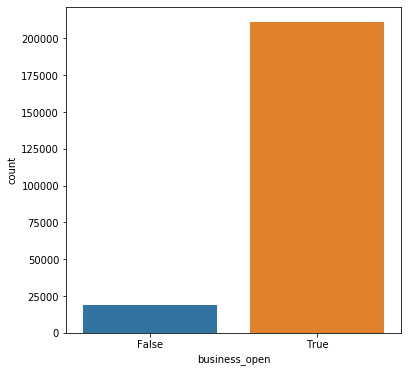

In [5]:
# Countplot for Number businesses Open and Close
plt.figure(figsize=(6,6))
sns.countplot(x='business_open',data=yelp_business);

In [6]:
#Regression Model
# These are the columns which are independant variables
cols1 = ['business_latitude',
 'business_longitude',
 'business_stars',
 'business_review_count']

In [7]:
X = yelp_business[cols1]
y = yelp_business['business_open']

In [8]:
# If anything has empty value then fill it with 0.0
X.fillna(0.0,inplace=True) 

/home/shree/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [9]:
# Split the dataset for training and testing
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [10]:
# SMOTE sampling 
sm = SMOTE(random_state=42)

In [11]:
# Fit the training set
X_res, y_res = sm.fit_sample(train_X, train_y)

In [12]:
# Make all of these as Dataframes
X_res = pd.DataFrame(X_res)
y_res = pd.DataFrame(y_res)
test_X = pd.DataFrame(test_X)
test_y = pd.DataFrame(test_y)

In [13]:
L = [0.0001,0.001,0.01,0.1,1,10] # These are regularization constant(C) using in regression
accuracy = {}
# For each values in L applying Logistic Regression
for i in L:
    LR = LogisticRegression(C=i)
    LR.fit(X_res,y_res)
    pred_y = LR.predict(test_X) # Prediction for testing dataset
    
    accuracy[i] = 100*accuracy_score(test_y,pred_y)

/home/shree/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/shree/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/shree/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/shree/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [16]:
accuracy # Different accuracy for different C Values

{0.0001: 52.24653125135923,
 0.001: 53.861656010322875,
 0.01: 54.91714149014831,
 0.1: 55.14186710741884,
 1: 55.15491569164745,
 10: 55.15491569164745}

In [17]:
# Seeing precision Recall F1 Score
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

       False       0.12      0.73      0.21      5713
        True       0.96      0.54      0.69     63260

    accuracy                           0.55     68973
   macro avg       0.54      0.63      0.45     68973
weighted avg       0.89      0.55      0.65     68973



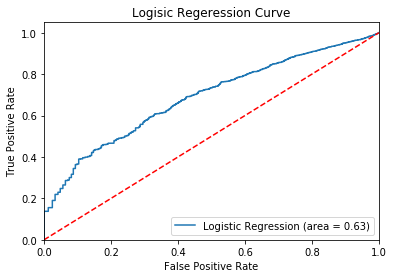

In [18]:
# ROC and AUC(Area Under Curve)
logit_roc_auc = roc_auc_score(test_y, LR.predict(test_X))
fpr, tpr, thresholds = roc_curve(test_y, LR.predict_proba(test_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logisic Regeression Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Text(0, 0.5, 'Accuracy')

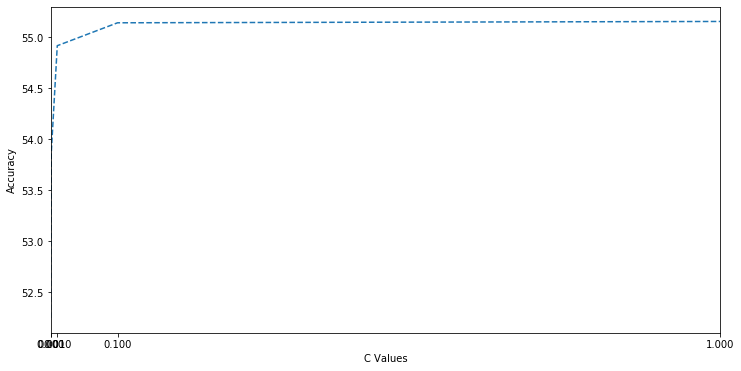

In [19]:
# C values vs Accuacy curve
plt.figure(figsize=(12,6))
plt.plot( list(accuracy.keys()), list(accuracy.values()), '--')
plt.xticks(list(accuracy.keys()))
plt.xlim(0,1)
plt.xlabel("C Values")
plt.ylabel("Accuracy")

In [20]:
LR = LogisticRegression(C=0.001)
LR.fit(X_res,y_res)
pred_y = LR.predict(test_X)

/home/shree/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [21]:
# Confusion matrix

confusion_matrix(test_y,pred_y)

array([[ 4176,  1537],
       [30286, 32974]])

In [22]:
# Final accuracy score
accuracy_score(test_y,pred_y)

0.5386165601032288

In [23]:
# Contribution of each variable
LR.coef_

array([[-0.01937932,  0.01290516,  0.40687412,  0.0080776 ]])